# ==== INTERACTIVE CLUSTERING : CONSTRAINTS NUMBER STUDY ====
> ### Stage 3 : Modelize constraints number required to converge and Plot some figures.

-----

## READ-ME BEFORE RUNNING

### Quick Description

This notebook is **aimed at modelize constraints number required to converge and plot several figures according to previous analyses**.
- Environments are represented by subdirectories in the `/experiments` folder. A full path to an experiment environment is `/experiments/[DATASET]/[PREPROCESSING]/[VECTORIZATION]/[SAMPLING]/[CLUSTERING]/[EXPERIMENT]`.
- An experiment run is composed of iterations of _interative clustering_.
- An experiment evaluation look at each _interative clustering_ iteration of the experiment.

Before running, **run the notebook `2_Run_until_convergence_and_evaluate_constraints_number_required.ipynb` to run interactive clustering experiment until convergence and estimate constraints number required to converge.**.

### Description each steps

First of all, **load experiment synthesis CSV file** that have made during interactive clustering experiments.
1. Modelize constraints number in function of dataset size

***WARNING***: _Start by launching the experiment runs, evaluations and synthesis, and launching main effects analysis before this section !_

-----

## 1. IMPORT PYTHON DEPENDENCIES

In [1]:
from typing import Dict, List, Optional, Tuple, Union
import numpy as np
import openpyxl
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy import stats as scipystats
import statistics
import statsmodels
import statsmodels.api
import statsmodels.formula.api

-----

## 2. LOAD DATA

In [2]:
df_experiments: pd.DataFrame = pd.read_csv(
    io="../results/experiments_synthesis.csv",
    engine="openpyxl",
)
#df_experiments["V090v__constraints_total"] = df_experiments["V090v__constraints_total"].replace(",", ".").astype(float)
df_experiments.head()

There are `960` experiment environments in `../experiments`


-----

## 3. ANALYZE DATA

In [3]:
# Fit the model to the data and print results.
model_constraints_number = statsmodels.formula.api.glm(
    formula="V090v__constraints_total ~ 1 + dataset_size",
    data=df_experiments,
)
results_constraints_number = model_constraints_number.fit()
print(results_constraints_number.summary())

In [4]:
# Print the modelization.
print(
    "CONSTRAINTS_NUMBER ~",
    "{0:.2E}".format(results_constraints_number.params["Intercept"]),
    "{0:.2E}*{1}".format(results_constraints_number.params["dataset_size"], "dataset_size")
)

perf_min  : 0.03423168663682721
perf_max  : 0.4774538343926329
perf_mean : 0.19053730863337626
perf_std  : 0.13376400727927928


In [ ]:
# Define the interpolation function.
def interpolation_constraints_number(dataset_size) -> Tuple[float, float, float]:
    # Initialization.
    res_low: float = 0.0
    res: float = 0.0
    res_high: float = 0.0
    # Intercept.
    res_low += (results_constraints_number.params["Intercept"] - results_constraints_number.bse["Intercept"])
    res += results_constraints_number.params["Intercept"]
    res_high += (results_constraints_number.params["Intercept"] + results_constraints_number.bse["Intercept"])
    # constraints_number.
    res_low += (results_constraints_number.params["dataset_size"] - results_constraints_number.bse["dataset_size"]) * dataset_size
    res += results_constraints_number.params["dataset_size"] * dataset_size
    res_high += (results_constraints_number.params["dataset_size"] + results_constraints_number.bse["dataset_size"]) * dataset_size
    # Return.
    return res_low, res, res_high

In [ ]:
# Create a new figure.
fig_plot_constraints_number: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_constraints_number = fig_plot_constraints_number.gca()

# Plot constraints number.
axis_plot_constraints_number.plot(
    axis_plot_constraints_number["dataset_size"],  # x
    axis_plot_constraints_number["V090v__constraints_total"],  # y
    label="Nombre de contraintes observé",
    marker="x",
    markerfacecolor="red",
    markersize=5,
    color="red",
    linewidth=0,
    linestyle="",
)
axis_plot_constraints_number.plot(
    range(0, 5001, 100),  # x
    [
        interpolation_constraints_number(x)[1]
        range(0, 5001, 100),  # x
    ],  # y
    label="Nombre de contraintes modélisé",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
axis_plot_constraints_number.fill_between(
    x=range(0, 5001, 100),  # x
    y1=[
        interpolation_constraints_number(x)[0]
        range(0, 5001, 100),  # x
    ],  # y1
    y2=[
        interpolation_constraints_number(x)[2]
        range(0, 5001, 100),  # x
    ],  # y2
    color="red",
    alpha=0.2,
)

# Set axis name.
axis_plot_constraints_number.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_constraints_number.set_ylabel("nombre de contraintes (#)", fontsize=18,)

# Plot the legend.
axis_plot_constraints_number.legend(
    loc="upper left",
    fontsize=15,
)

# Plot the grid.
axis_plot_constraints_number.grid(True)
    
# Store the graph.
fig_plot_constraints_number.savefig(
    "../results/etude-nombre-contraintes-1-modelisation-nombre.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

In [24]:
with_error_bars = True

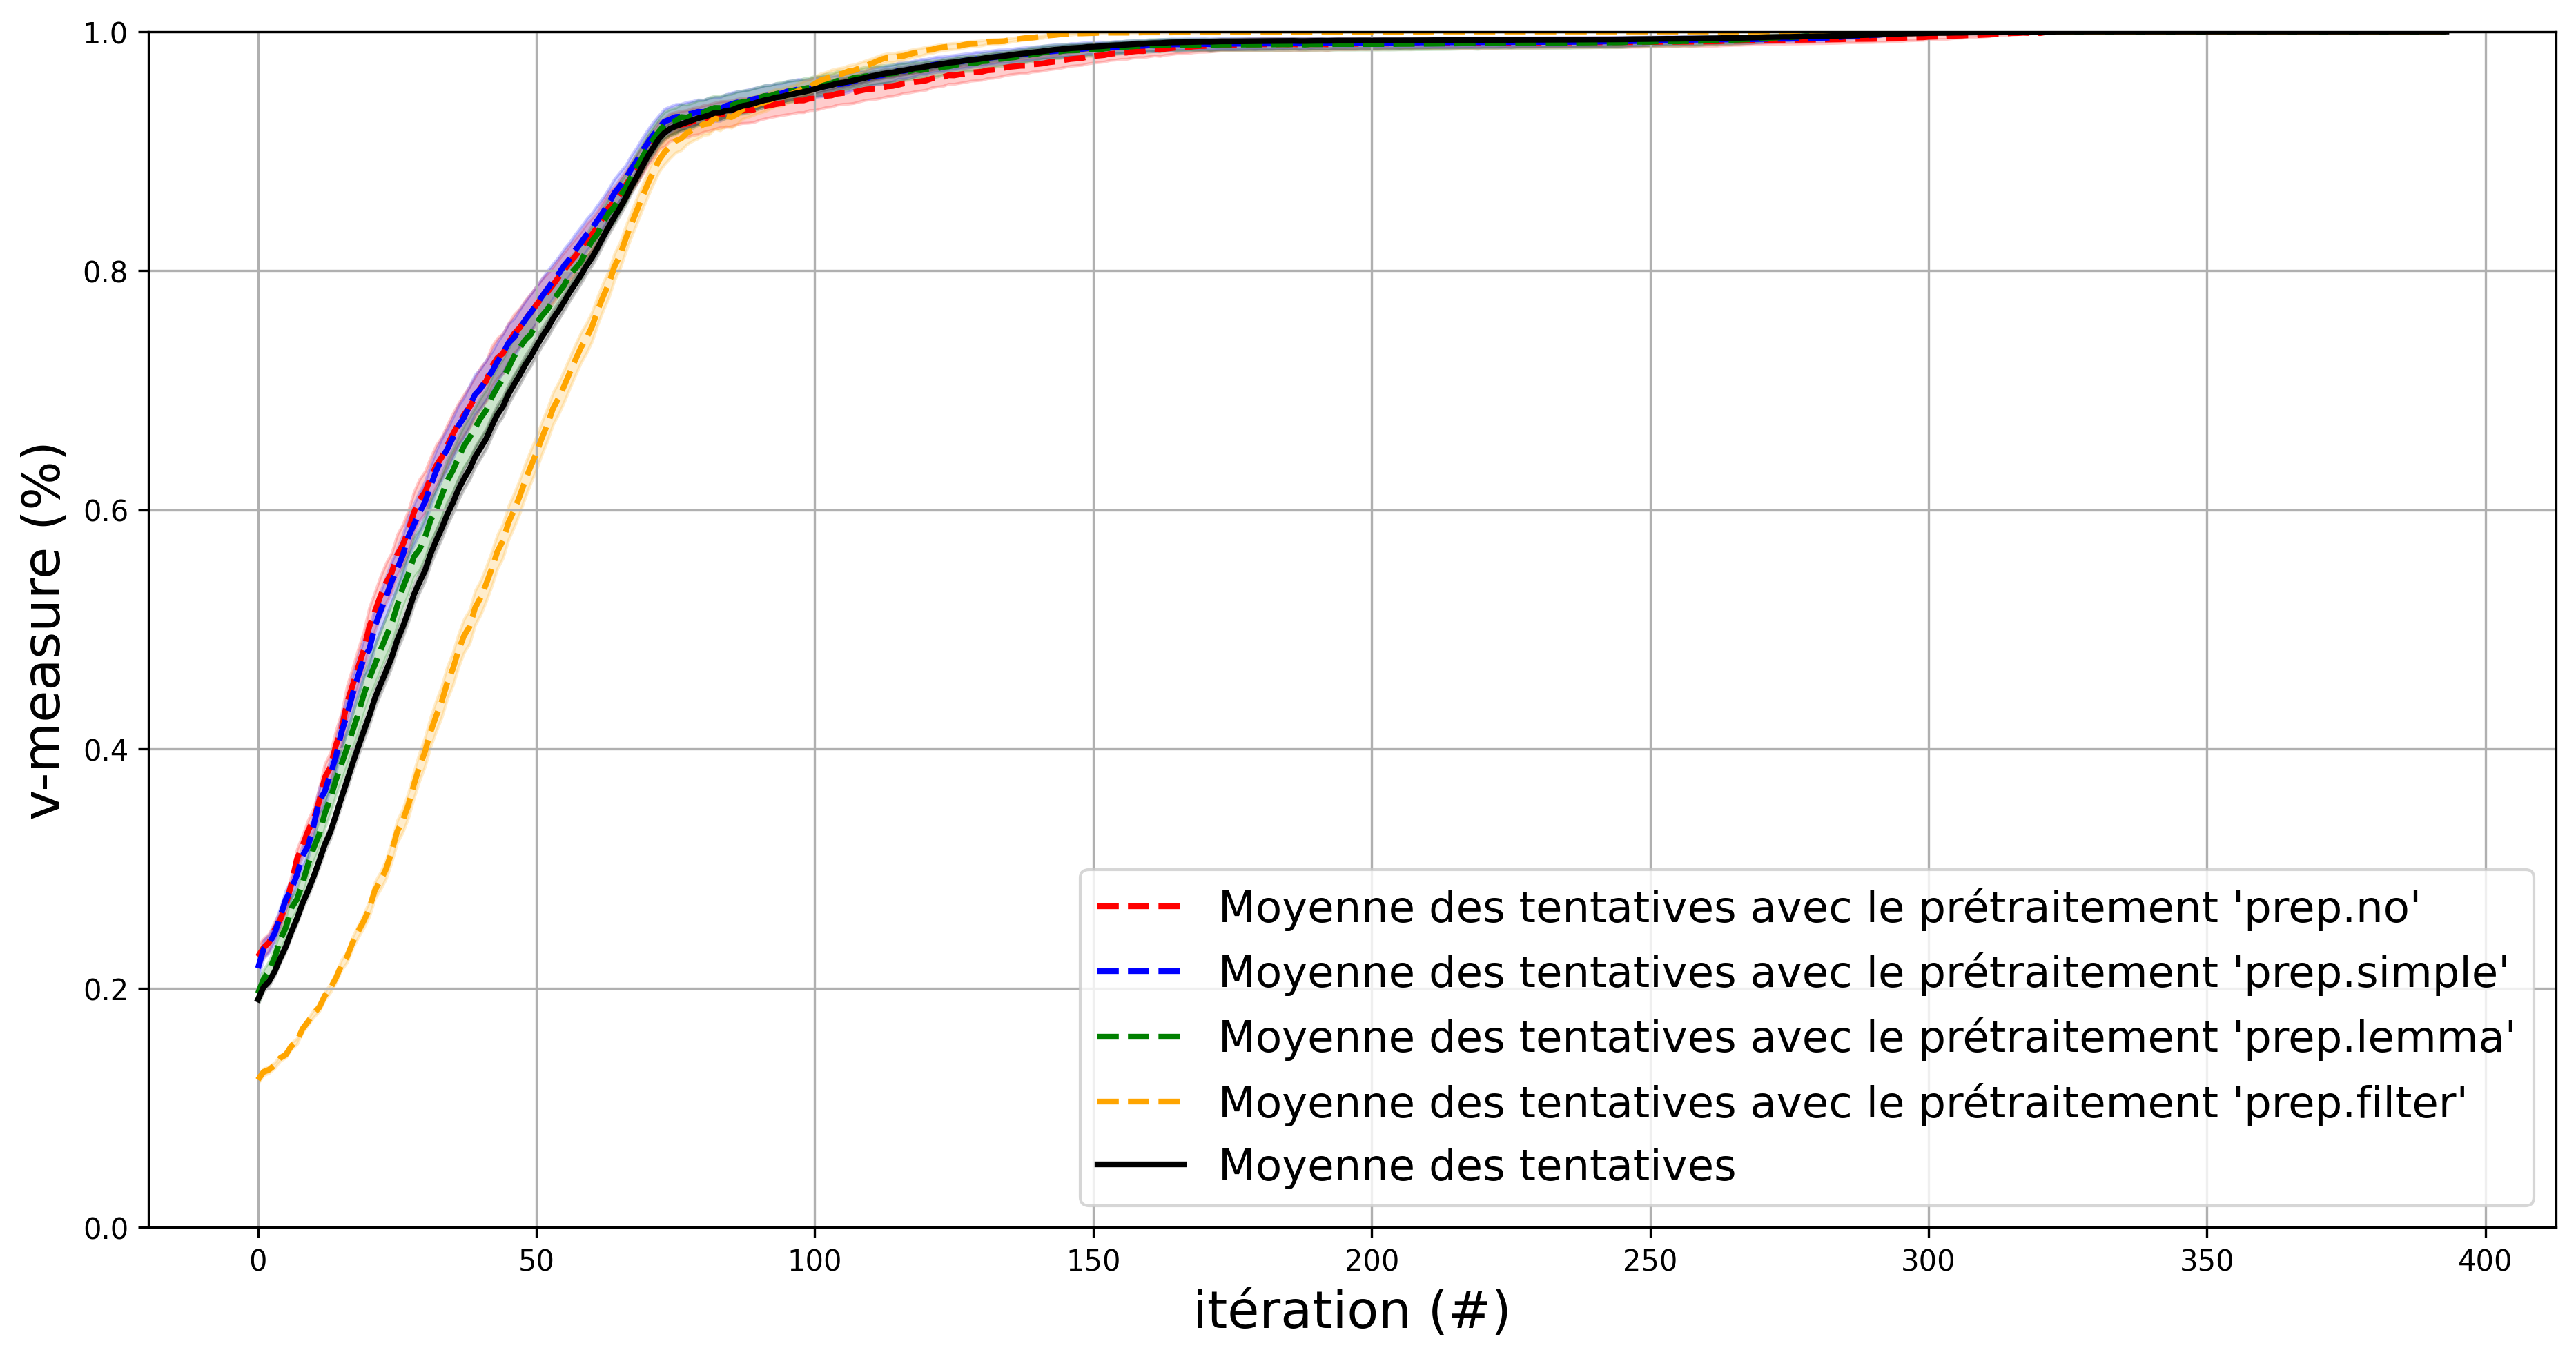

In [25]:
# Create a new figure.
fig_plot_prep: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_prep = fig_plot_prep.gca()

# Set range of axis.
axis_plot_prep.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for no-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_no_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.no'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_no_prep[iter_errinf_plot] - SEM_convergence_no_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_no_prep[iter_errsup_plot] + SEM_convergence_no_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for simple-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_simple_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.simple'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_simple_prep[iter_errinf_plot] - SEM_convergence_simple_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_simple_prep[iter_errsup_plot] + SEM_convergence_simple_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for lemma-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_lemma_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.lemma'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_lemma_prep[iter_errinf_plot] - SEM_convergence_lemma_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_lemma_prep[iter_errsup_plot] + SEM_convergence_lemma_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for filter-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_filter_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.filter'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_filter_prep[iter_errinf_plot] - SEM_convergence_filter_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_filter_prep[iter_errsup_plot] + SEM_convergence_filter_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_prep.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_prep.set_xlabel("itération (#)", fontsize=18,)
axis_plot_prep.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_prep.legend(fontsize=15,)

# Plot the grid.
axis_plot_prep.grid(True)

In [26]:
# Store the graph.
fig_plot_prep.savefig(
    "../results/etude-convergence-evolution-moyenne-1preprocessing-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + VECTORIZATION.

In [27]:
MEAN_convergence_tfidf, SEM_convergence_tfidf = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "tfidf" in env
    ],
)

In [28]:
MEAN_convergence_fr_core_news_md, SEM_convergence_fr_core_news_md = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "fr_core_news_md" in env
    ],
)

In [29]:
with_error_bars = True

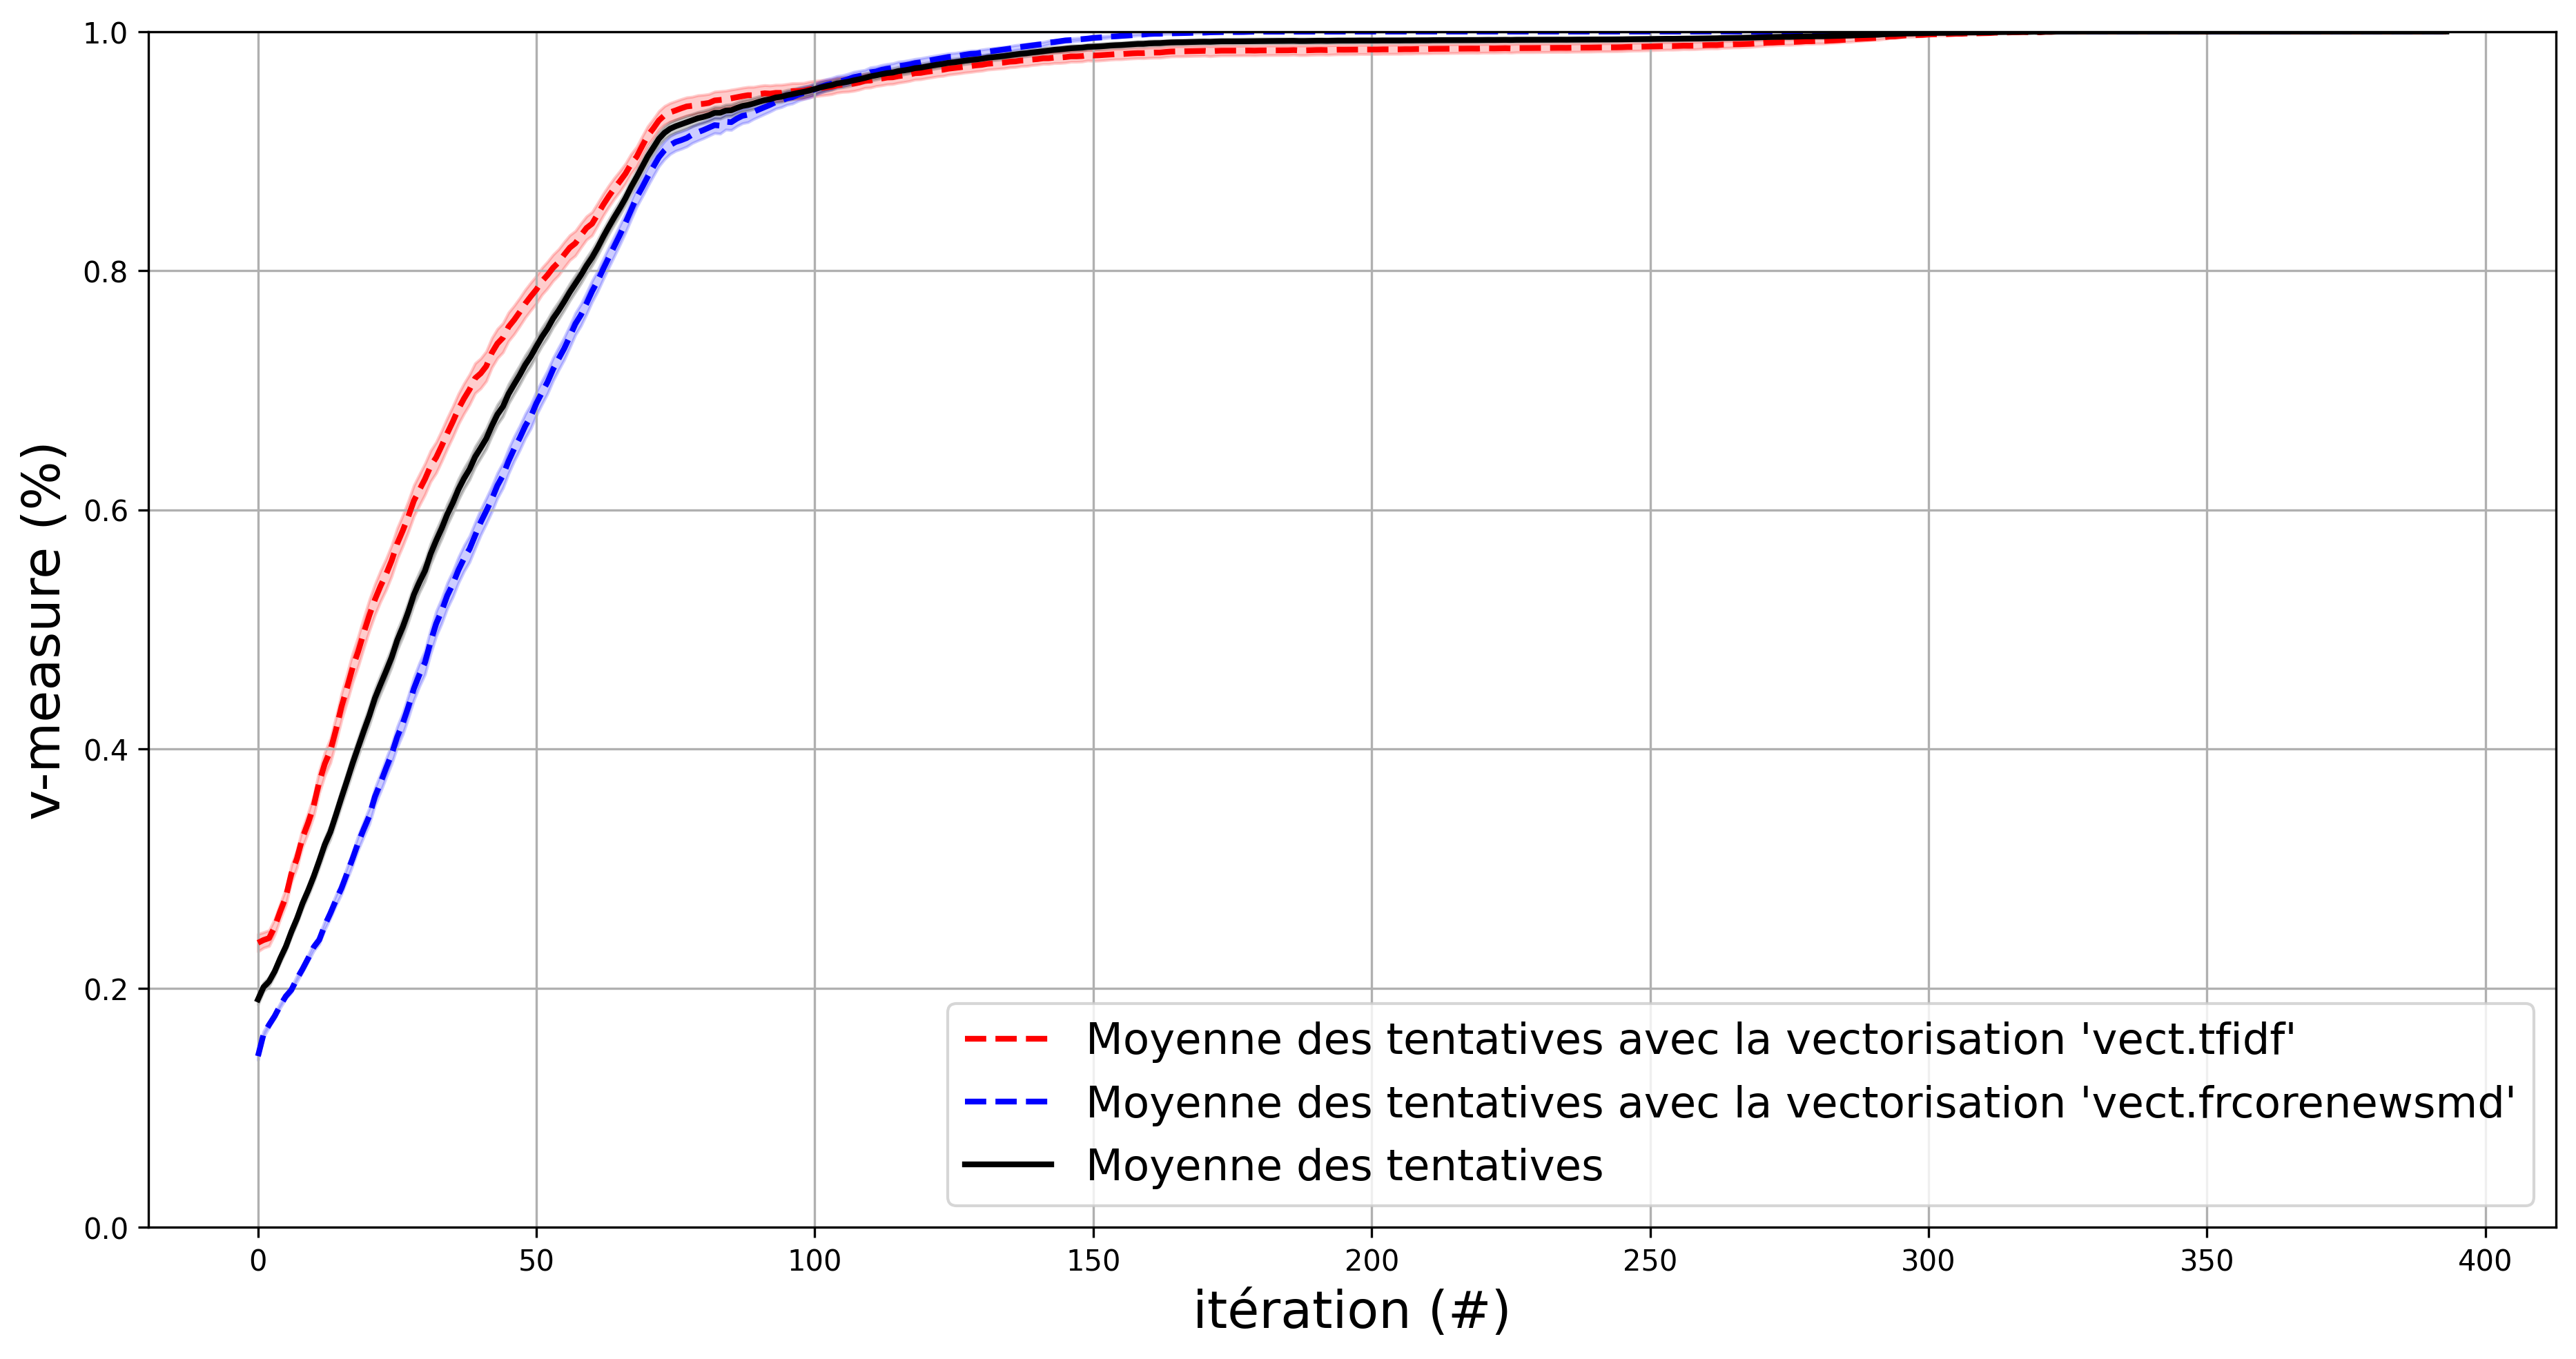

In [30]:
# Create a new figure.
fig_plot_vect: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_vect = fig_plot_vect.gca()

# Set range of axis.
axis_plot_vect.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for tfidf.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_tfidf[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec la vectorisation 'vect.tfidf'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vect.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_tfidf[iter_errinf_plot] - SEM_convergence_tfidf[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_tfidf[iter_errsup_plot] + SEM_convergence_tfidf[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for fr-core-news-md.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_fr_core_news_md[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec la vectorisation 'vect.frcorenewsmd'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vect.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_fr_core_news_md[iter_errinf_plot] - SEM_convergence_fr_core_news_md[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_fr_core_news_md[iter_errsup_plot] + SEM_convergence_fr_core_news_md[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_vect.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_vect.set_xlabel("itération (#)", fontsize=18,)
axis_plot_vect.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_vect.legend(fontsize=15,)

# Plot the grid.
axis_plot_vect.grid(True)

In [31]:
# Store the graph.
fig_plot_vect.savefig(
    "../results/etude-convergence-evolution-moyenne-2vectorization-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + CLUSTERING.

In [32]:
MEAN_convergence_kmeans_COP, SEM_convergence_kmeans_COP = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "kmeans_COP" in env
    ],
)

In [33]:
MEAN_convergence_hier_sing, SEM_convergence_hier_sing = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_sing" in env
    ],
)

In [34]:
MEAN_convergence_hier_comp, SEM_convergence_hier_comp = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_comp" in env
    ],
)

In [35]:
MEAN_convergence_hier_avg, SEM_convergence_hier_avg = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_avg" in env
    ],
)

In [36]:
MEAN_convergence_hier_ward, SEM_convergence_hier_ward = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_ward" in env
    ],
)

In [37]:
MEAN_convergence_spectral_SPEC, SEM_convergence_spectral_SPEC = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "spectral_SPEC" in env
    ],
)

In [38]:
with_error_bars = True

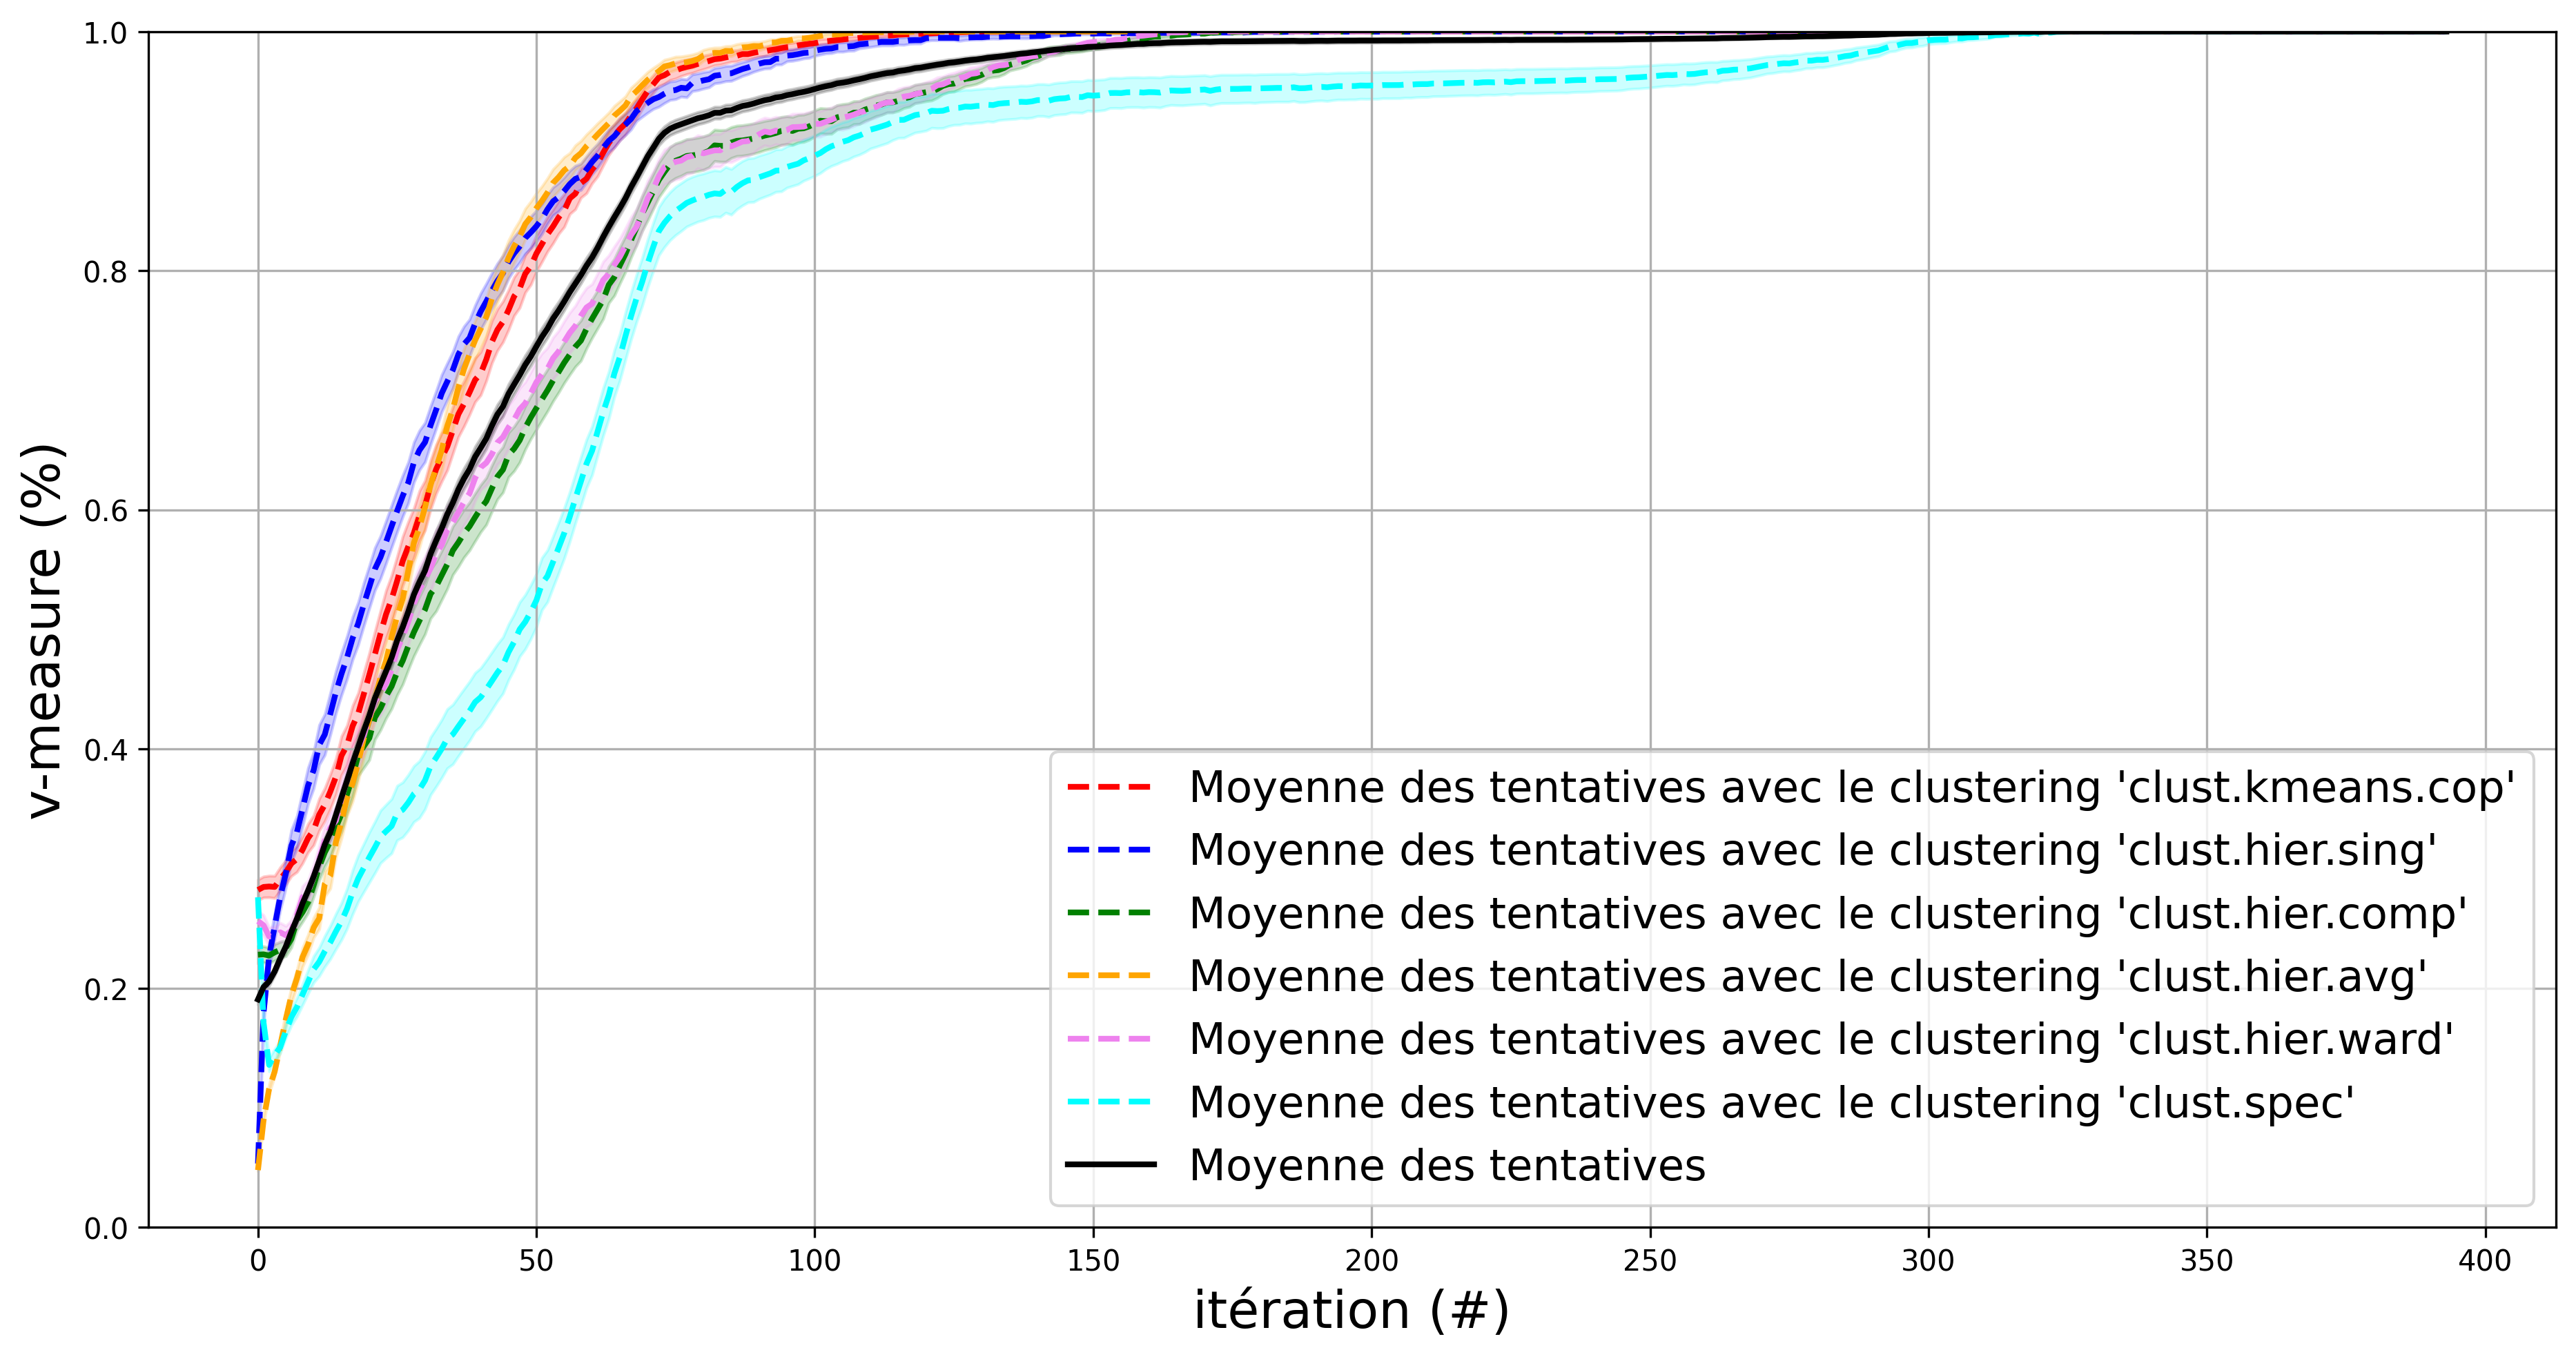

In [39]:
# Create a new figure.
fig_plot_clust: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_clust = fig_plot_clust.gca()

# Set range of axis.
axis_plot_clust.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for kmeans_COP.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_kmeans_COP[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.kmeans.cop'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_kmeans_COP[iter_errinf_plot] - SEM_convergence_kmeans_COP[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_kmeans_COP[iter_errsup_plot] + SEM_convergence_kmeans_COP[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_sing.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_sing[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.sing'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_sing[iter_errinf_plot] - SEM_convergence_hier_sing[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_sing[iter_errsup_plot] + SEM_convergence_hier_sing[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_comp.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_comp[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.comp'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_comp[iter_errinf_plot] - SEM_convergence_hier_comp[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_comp[iter_errsup_plot] + SEM_convergence_hier_comp[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_avg.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_avg[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.avg'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_avg[iter_errinf_plot] - SEM_convergence_hier_avg[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_avg[iter_errsup_plot] + SEM_convergence_hier_avg[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_ward.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_ward[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.ward'",
    marker="",
    markerfacecolor="violet",
    markersize=3,
    color="violet",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_ward[iter_errinf_plot] - SEM_convergence_hier_ward[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_ward[iter_errsup_plot] + SEM_convergence_hier_ward[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="violet",
        alpha=0.2,
    )
# Plot average clustering performance evolution for spectral_SPEC.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_spectral_SPEC[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.spec'",
    marker="",
    markerfacecolor="cyan",
    markersize=3,
    color="cyan",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_spectral_SPEC[iter_errinf_plot] - SEM_convergence_spectral_SPEC[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_spectral_SPEC[iter_errsup_plot] + SEM_convergence_spectral_SPEC[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="cyan",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_clust.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_clust.set_xlabel("itération (#)", fontsize=18,)
axis_plot_clust.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_clust.legend(fontsize=15,)

# Plot the grid.
axis_plot_clust.grid(True)

In [40]:
# Store the graph.
fig_plot_clust.savefig(
    "../results/etude-convergence-evolution-moyenne-3clustering-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + SAMPLING.

In [41]:
MEAN_convergence_random, SEM_convergence_random = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "random" in env
    ],
)

In [42]:
MEAN_convergence_in_same, SEM_convergence_in_same = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "in_same" in env
    ],
)

In [43]:
MEAN_convergence_farthest, SEM_convergence_farthest = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "farthest" in env
    ],
)

In [44]:
MEAN_convergence_closest, SEM_convergence_closest = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "closest" in env
    ],
)

In [45]:
with_error_bars = True

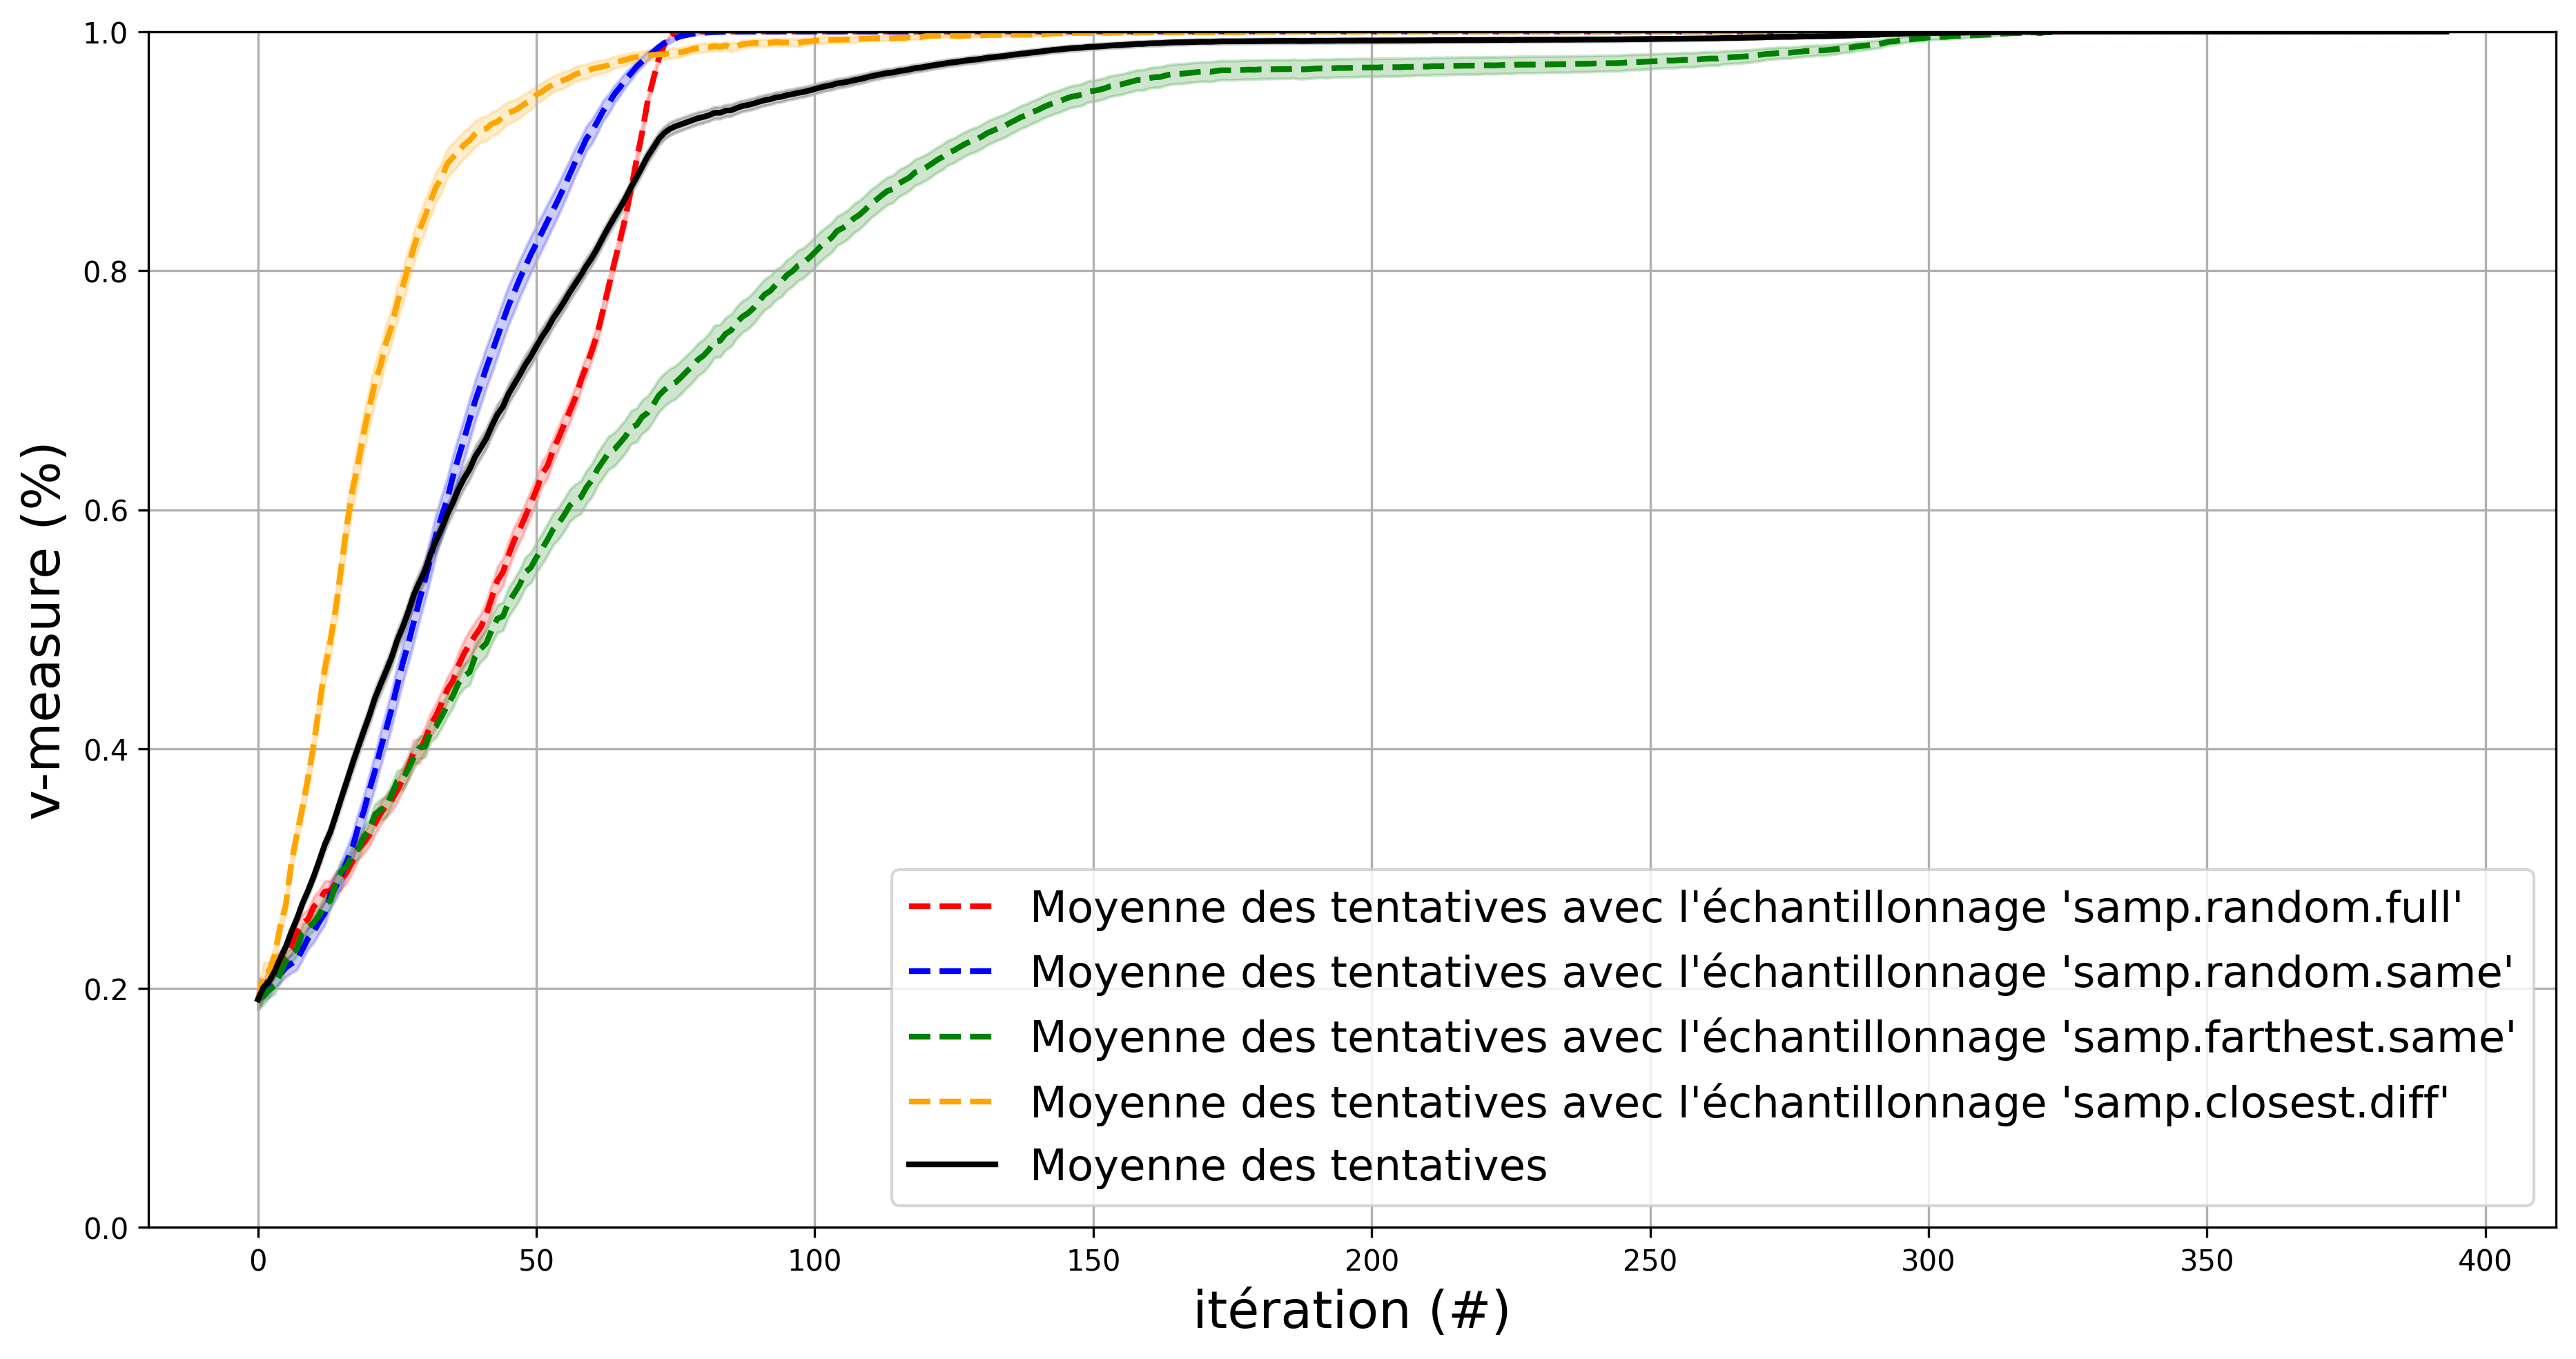

In [46]:
# Create a new figure.
fig_plot_samp: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_samp = fig_plot_samp.gca()

# Set range of axis.
axis_plot_samp.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for random.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_random[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.random.full'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_random[iter_errinf_plot] - SEM_convergence_random[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_random[iter_errsup_plot] + SEM_convergence_random[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for random-in-same.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_in_same[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.random.same'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_in_same[iter_errinf_plot] - SEM_convergence_in_same[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_in_same[iter_errsup_plot] + SEM_convergence_in_same[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for farthest.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_farthest[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.farthest.same'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_farthest[iter_errinf_plot] - SEM_convergence_farthest[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_farthest[iter_errsup_plot] + SEM_convergence_farthest[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for closest.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_closest[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.closest.diff'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_closest[iter_errinf_plot] - SEM_convergence_closest[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_closest[iter_errsup_plot] + SEM_convergence_closest[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_samp.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_samp.set_xlabel("itération (#)", fontsize=18,)
axis_plot_samp.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_samp.legend(fontsize=15,)

# Plot the grid.
axis_plot_samp.grid(True)

In [47]:
# Store the graph.
fig_plot_samp.savefig(
    "../results/etude-convergence-evolution-moyenne-4sampling-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + BEST SETTINGS.

In [48]:
MEAN_convergence_BEST_ANOVA_80, SEM_convergence_BEST_ANOVA_80 = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("simple_prep" in env)
        and ("tfidf" in env)
        and ("hier_avg" in env or "hier_sing" in env)
        and ("closest" in env)
    ],
)

In [49]:
MEAN_convergence_BEST_ANOVA_100, SEM_convergence_BEST_ANOVA_100 = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("closest" in env)
    ],
)

In [50]:
MEAN_convergence_BEST_ANOVA_MAX, SEM_convergence_BEST_ANOVA_MAX = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("in_same" in env)
    ],
)

In [51]:
with_error_bars = True

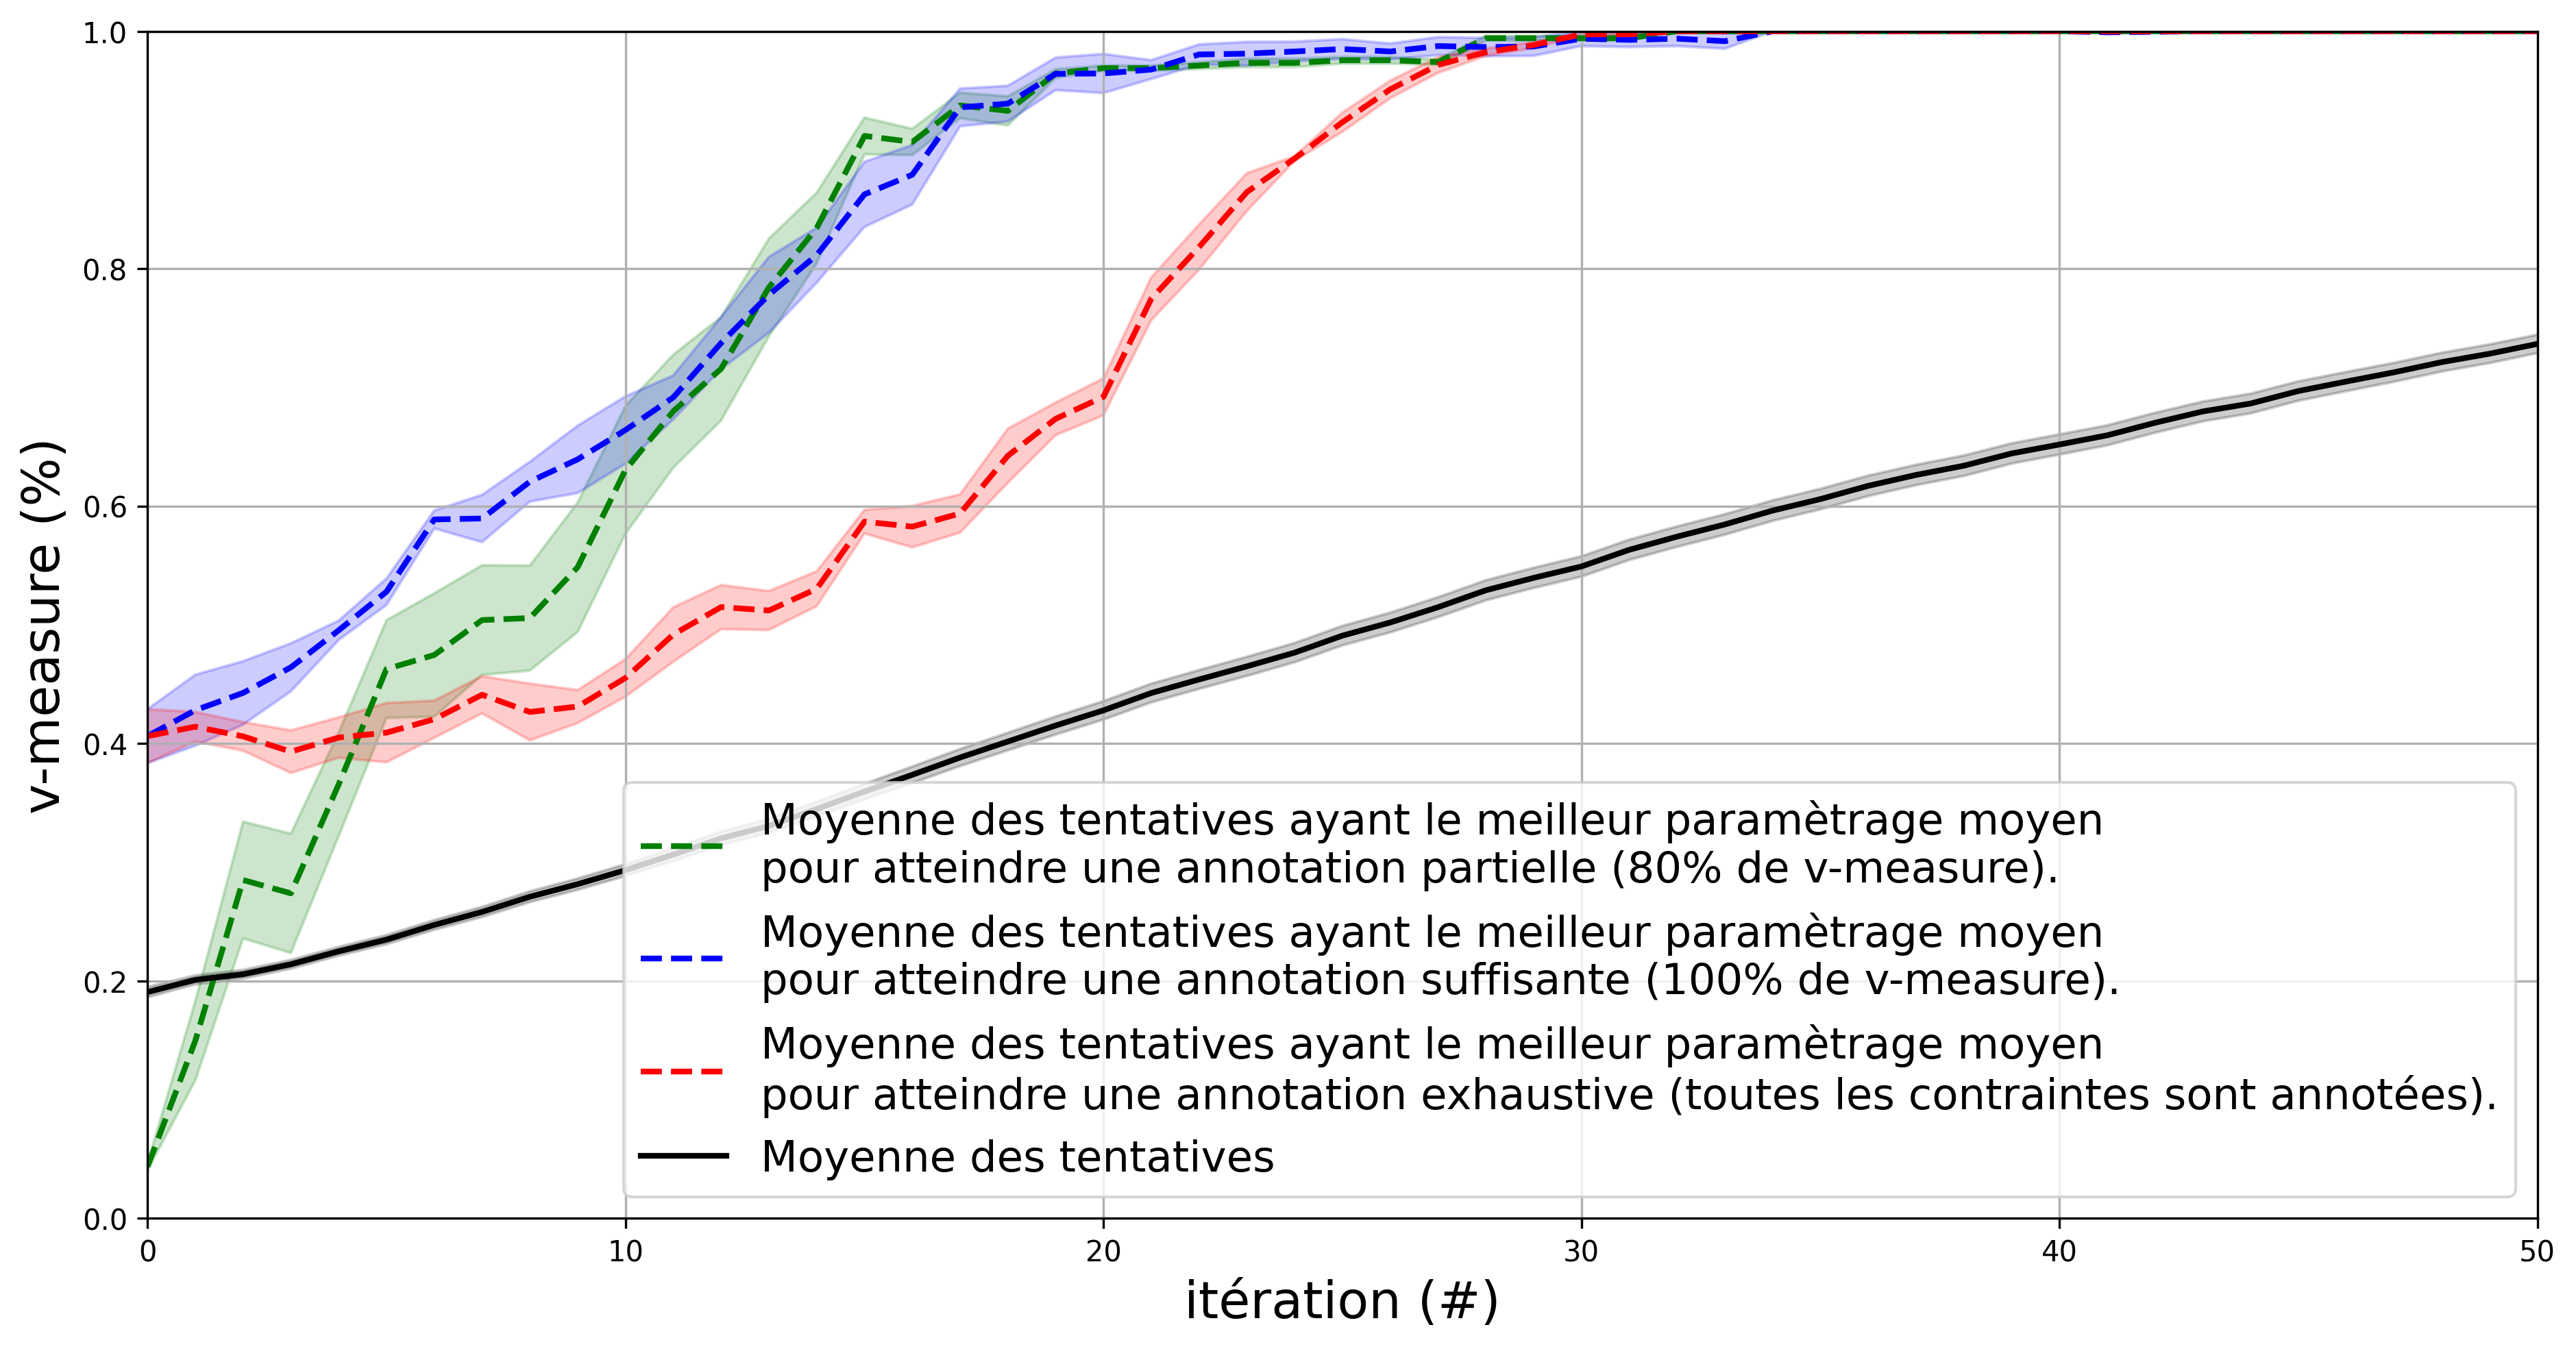

In [52]:
# Create a new figure.
fig_plot_best_anova: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_best_anova = fig_plot_best_anova.gca()

# Set range of axis.
axis_plot_best_anova.set_xlim(xmin=0, xmax=50)
axis_plot_best_anova.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution to reach 80% of vmeasure.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_80[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation partielle (80% de v-measure).",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_80[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_80[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_80[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_80[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution to reach 100% of vmeasure.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_100[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation suffisante (100% de v-measure).",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_100[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_100[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_100[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_100[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution to reach constraints completude.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_MAX[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation exhaustive (toutes les contraintes sont annotées).",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_MAX[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_MAX[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_MAX[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_MAX[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_best_anova.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_best_anova.set_xlabel("itération (#)", fontsize=18,)
axis_plot_best_anova.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_best_anova.legend(fontsize=15,)

# Plot the grid.
axis_plot_best_anova.grid(True)

In [53]:
# Store the graph.
fig_plot_best_anova.savefig(
    "../results/etude-convergence-evolution-moyenne-5best-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

-----

## [DRAFT] Test usage in PhD Report

In [ ]:
# Définir les données.
dict_of_texts = {
    "0": "Comment signaler un vol de carte bancaire ?",
    "1": "J'ai égaré ma carte bancaire, que faire ?",
    "2": "J'ai perdu ma carte de paiement",
    "3": "Le distributeur a avalé ma carte !",
    "4": "En retirant de l'argent, le GAB a gardé ma carte...",
    "5": "Le distributeur ne m'a pas rendu ma carte bleue.",
    # ...
    "N": "Pourquoi le sans contact ne fonctionne pas ?",
}

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.utils.preprocessing import preprocess
from cognitivefactory.interactive_clustering.utils.vectorization import vectorize

# Prétraitement des données.
dict_of_preprocess_texts = preprocess(
    dict_of_texts=dict_of_texts,
    apply_stopwords_deletion=False,
    apply_parsing_filter=False,
    apply_lemmatization=False,
    spacy_language_model="fr_core_news_md",
)
"""
    {"0": "comment signaler un vol de carte bancaire",
     "1": "j ai egare ma carte bancaire, que faire",
     "2": "j ai perdu ma carte de paiement",
     "3": "le distributeur a avale ma carte",
     "4": "en retirant de l argent le gab a garde ma carte",
     "5": "le distributeur ne m a pas rendu ma carte bleue",
     # ...
     "N": "pourquoi le sans contact ne fonctionne pas"}
"""

# Vectorisation des données.
dict_of_vectors = vectorize(
    dict_of_texts=dict_of_preprocess_texts,
    vectorizer_type="tfidf",
)

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.constraints.factory import managing_factory

# Création du gestionnaire de contraintes.
constraints_manager = managing_factory(
    manager="binary",
    list_of_data_IDs = list(dict_of_texts.keys()),  # ["0", "1", "2", "3", "4", "5", ..., "N"]
)

# Ajout de contraintes.
constraints_manager.add_constraint(
	data_ID1="0",  # "Comment signaler un vol de carte bancaire ?"
	data_ID2="1",  # "J'ai égaré ma carte bancaire, que faire ?"
	constraint_type="MUST_LINK",
)
constraints_manager.add_constraint(
	data_ID1="3",  # "Le distributeur a avalé ma carte !"
	data_ID2="4",  # "En retirant de l'argent, le GAB a gardé ma carte..."
	constraint_type="MUST_LINK",
)
constraints_manager.add_constraint(
	data_ID1="0",  # "Comment signaler un vol de carte bancaire ?"
	data_ID2="N",  # "Pourquoi le sans contact ne fonctionne pas ?"
	constraint_type="CANNOT_LINK",
)
    # NB: ajouter une contrainte "MUST_LINK" entre "1" et "N" lèverait une erreur.

constraints_manager.get_connected_components()
"""
	[['0', '1'],
	 ['2'],
	 ['3', '4'],
	 ['5'],
	 ['N']]
"""

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.clustering.factory import clustering_factory

# Initialiser un objet de clustering.
clustering_model = clustering_factory(
    algorithm="kmeans",
    model="COP",
    random_seed=42,
)

# Lancer le clustering.
clustering_result = clustering_model.cluster(
    constraints_manager=constraints_manager,
    nb_clusters=2,
    vectors=dict_of_vectors,
)
"""
    {"0": 0,  # "comment signaler un vol de carte bancaire"
     "1": 0,  # "j ai egare ma carte bancaire, que faire"
     "2": 0,  # "j ai perdu ma carte de paiement"
     "3": 1,  # "le distributeur a avale ma carte"
     "4": 1,  # "en retirant de l argent le gab a garde ma carte"
     "5": 1,  # "le distributeur ne m a pas rendu ma carte bleue"
     # ...
     "N": 1}  # "pourquoi le sans contact ne fonctionne pas"
"""

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.sampling.factory import sampling_factory

# Initialiser un objet d'échantillonnage.
sampler = sampling_factory(
	algorithm="random",
    random_seed=42,
)

# Run sampling.
selection = sampler.sample(
	constraints_manager=constraints_manager,
	nb_to_select=2,
	clustering_result=clustering_result,  # optionnel pour "random"
	vectors=dict_of_vectors,  # optionnel pour "random"
)
"""
	[("0", '5"),  # "Comment signaler un vol de carte bancaire ?" vs "Le distributeur ne m'a pas rendu ma carte bleue."
	 ("0", '2"),  # "Comment signaler un vol de carte bancaire ?" vs "J'ai perdu ma carte de paiement"
	 ("2", 'N")]  # "J'ai perdu ma carte de paiement" vs "Pourquoi le sans contact ne fonctionne pas ?"
"""